In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData
from sqlalchemy import Table
from sqlalchemy import Column



# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
freedom_index_csv = "C:\\Users\\JMadd\\git\\ETL_Project\\freedom.csv"

freedom_df = pd.read_csv(freedom_index_csv)


In [2]:
freedom_df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [3]:
#select only info that I intend to use
freedom_df = freedom_df[['year', 'countries', 'pf_rol_civil', 'pf_rol_criminal', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_movement_women', 'pf_movement', 'pf_religion', 'pf_association_political', 'pf_expression_killed', 'pf_expression_jailed', 'pf_expression_influence', 'pf_expression', 'pf_identity_sex', 'pf_identity_divorce', 'ef_legal_protection', 'ef_legal_military', 'ef_trade_movement', 'ef_regulation_credit_ownership']].copy()


In [4]:
#change names of columns so that they are readable
freedom_df = freedom_df.rename(columns={"pf_rol_civil": "Civil justice", "pf_rol_criminal": "Criminal justice", 'pf_ss_homicide': 'Homicide', 'pf_ss_disappearances_disap': 'Disappearances', 'pf_movement_women': 'Womens movement', 'pf_movement': 'Freedom of movement', 'pf_religion': 'Religious freedom', 'pf_association_political': 'Freedom to establish and operate political parties', 'pf_expression_killed': 'Press killed', 'pf_expression_jailed': 'Press jailed', 'pf_expression_influence': 'regulations influence media', 'pf_expression': 'Freedom of expression', 'pf_identity_sex': 'Same-sex ralitionships', 'pf_identity_divorce': 'Divorce', 'ef_legal_protection': 'Protection of property', 'ef_legal_military': 'Military interference in law',
                   'ef_trade_movement': 'Control over movement of people and goods', 'ef_regulation_credit_ownership': 'Ownership of Banks'})

In [5]:
freedom_df

,year,countries,Civil justice,Criminal justice,Homicide,Disappearances,Womens movement,Freedom of movement,Religious freedom,Freedom to establish and operate political parties,Press killed,Press jailed,regulations influence media,Freedom of expression,Same-sex ralitionships,Divorce,Protection of property,Military interference in law,Control over movement of people and goods,Ownership of Banks
0,2016,Albania,4.547244,4.666508,8.920429,10.0,5.0,6.666667,9.192593,10.000000,10.000000,10.000000,5.000000,8.607143,10.0,5.0,4.512228,8.333333,6.406138,5.0
1,2016,Algeria,NaN,NaN,9.456254,10.0,5.0,5.000000,4.944815,5.000000,10.000000,10.000000,2.666667,7.380952,0.0,0.0,4.689952,4.166667,1.590362,0.0
2,2016,Angola,NaN,NaN,8.060260,5.0,10.0,5.000000,8.786667,2.500000,10.000000,10.000000,2.666667,6.452381,0.0,10.0,2.512364,3.333333,2.044823,8.0
3,2016,Argentina,5.791960,4.343930,7.622974,10.0,10.0,10.000000,7.795926,5.000000,10.000000,10.000000,5.666667,8.738095,10.0,10.0,4.255995,7.500000,4.697482,5.0
4,2016,Armenia,NaN,NaN,8.808750,10.0,10.0,6.666667,6.222222,5.000000,10.000000,10.000000,3.333333,7.154762,10.0,5.0,5.664317,5.833333,6.830998,10.0
5,2016,Australia,7.525648,7.364078,9.623538,10.0,10.0,10.000000,9.075926,10.000000,10.000000,10.000000,8.000000,9.392857,10.0,10.0,7.998304,10.000000,3.859781,10.0
6,2016,Austria,7.872188,7.673227,9.737912,10.0,10.0,10.000000,7.925185,10.000000,10.000000,10.000000,7.333333,9.333333,10.0,10.0,8.092565,10.000000,5.906786,8.0
7,2016,Azerbaijan,NaN,NaN,9.143499,10.0,5.0,5.000000,5.461111,2.500000,10.000000,4.875900,0.333333,4.708462,10.0,5.0,6.321836,5.000000,4.093268,5.0
8,2016,Bahamas,6.008696,6.262840,0.000000,10.0,NaN,10.000000,7.938889,NaN,10.000000,10.000000,8.333333,8.895833,10.0,NaN,NaN,10.000000,5.384615,10.0
9,2016,Bahrain,NaN,NaN,9.790481,10.0,5.0,6.666667,7.461481,0.000000,10.000000,0.000000,0.666667,4.130952,10.0,0.0,7.435713,5.000000,4.794819,10.0


In [6]:
#freedom_df.set_index('year', inplace=True)
#freedom_df.head()

In [7]:
dfObj = freedom_df.sort_values(by =['countries', 'year']).reset_index()

freedom_df = pd.DataFrame(dfObj)
freedom_df.head()

,index,year,countries,Civil justice,Criminal justice,Homicide,Disappearances,Womens movement,Freedom of movement,Religious freedom,...,Press killed,Press jailed,regulations influence media,Freedom of expression,Same-sex ralitionships,Divorce,Protection of property,Military interference in law,Control over movement of people and goods,Ownership of Banks
0,1296,2008,Albania,5.074785,4.100516,8.756539,10.0,10.0,10.000000,9.195000,...,10.0,10.0,4.666667,7.666667,10.0,NaN,3.717371,8.333333,2.109925,5.0
1,1134,2009,Albania,5.074785,4.100516,8.852373,10.0,10.0,10.000000,9.791667,...,10.0,10.0,4.666667,7.666667,10.0,NaN,3.913393,8.333333,3.624133,5.0
2,972,2010,Albania,5.074785,4.100516,8.272417,10.0,10.0,10.000000,9.416667,...,10.0,10.0,4.666667,7.604167,10.0,NaN,4.046221,8.333333,3.675338,5.0
3,810,2011,Albania,5.074785,4.100516,8.059220,10.0,5.0,6.666667,9.135185,...,10.0,10.0,4.666667,8.595238,10.0,NaN,3.561092,8.333333,3.423734,5.0
4,648,2012,Albania,4.900000,3.600000,7.849344,10.0,5.0,6.666667,9.305556,...,10.0,10.0,5.000000,8.678571,10.0,NaN,3.075611,8.333333,3.216676,5.0


In [8]:
census_csv = "C:\\Users\\JMadd\\git\\ETL_Project\\Census_reshaped.csv"

census_df = pd.read_csv(census_csv)

In [9]:
census_df.head()

,Unnamed: 0,country,year,crude_birth_rate,crude_death_rate,growth_rate,infant_mortality,infant_mortality_female,infant_mortality_male,life_expectancy,...,life_expectancy_male,midyear_population,mortality_rate_1to4,mortality_rate_1to4_female,mortality_rate_1to4_male,mortality_rate_under5,mortality_rate_under5_female,mortality_rate_under5_male,net_migration,rate_natural_increase
0,0,Afghanistan,2008,40.30,15.64,3.269,130.52,121.80,138.83,48.19,...,47.03,27705724.0,72.78,73.89,71.70,193.80,186.69,200.58,8.03,2.466
1,1,Afghanistan,2009,40.05,15.34,2.282,128.34,119.73,136.54,48.56,...,47.38,28483631.0,71.03,72.06,70.03,190.25,183.16,197.01,-1.90,2.471
2,2,Afghanistan,2010,39.77,15.09,2.143,126.19,117.69,134.29,48.93,...,47.72,29120727.0,69.32,70.28,68.38,186.76,179.70,193.49,-3.25,2.468
3,3,Afghanistan,2011,39.53,14.84,2.183,123.89,115.51,131.88,49.33,...,48.09,29757566.0,67.50,68.37,66.65,183.02,175.98,189.74,-2.87,2.469
4,4,Afghanistan,2012,39.30,14.59,2.220,121.63,113.36,129.51,49.72,...,48.45,30419928.0,65.73,66.53,64.95,179.37,172.35,186.05,-2.51,2.471


In [10]:
census_df = census_df.rename(columns={"Country": "countries", "Year": "year"})
census_df.drop(['Unnamed: 0'], axis=1)
census_df.head()

,Unnamed: 0,country,year,crude_birth_rate,crude_death_rate,growth_rate,infant_mortality,infant_mortality_female,infant_mortality_male,life_expectancy,...,life_expectancy_male,midyear_population,mortality_rate_1to4,mortality_rate_1to4_female,mortality_rate_1to4_male,mortality_rate_under5,mortality_rate_under5_female,mortality_rate_under5_male,net_migration,rate_natural_increase
0,0,Afghanistan,2008,40.30,15.64,3.269,130.52,121.80,138.83,48.19,...,47.03,27705724.0,72.78,73.89,71.70,193.80,186.69,200.58,8.03,2.466
1,1,Afghanistan,2009,40.05,15.34,2.282,128.34,119.73,136.54,48.56,...,47.38,28483631.0,71.03,72.06,70.03,190.25,183.16,197.01,-1.90,2.471
2,2,Afghanistan,2010,39.77,15.09,2.143,126.19,117.69,134.29,48.93,...,47.72,29120727.0,69.32,70.28,68.38,186.76,179.70,193.49,-3.25,2.468
3,3,Afghanistan,2011,39.53,14.84,2.183,123.89,115.51,131.88,49.33,...,48.09,29757566.0,67.50,68.37,66.65,183.02,175.98,189.74,-2.87,2.469
4,4,Afghanistan,2012,39.30,14.59,2.220,121.63,113.36,129.51,49.72,...,48.45,30419928.0,65.73,66.53,64.95,179.37,172.35,186.05,-2.51,2.471


In [11]:
#census_df.set_index(['year', 'countries'])
#census_df.head()

In [12]:
#new_df = pd.merge(freedom_df, census_df,  how='left', on=['year', 'countries'])
#census_df.drop(['Unnamed: 0'], axis=1)
#new_df.head()

In [13]:
connection_string = "postgres:pineapple@localhost:5432/ETL_Project"
engine = create_engine(f'postgresql://{connection_string}')
#new_df.to_sql('countries', con=engine)
engine.execute("SELECT * FROM census").fetchall()

[(0, 0, 'Afghanistan', 2008, 40.3, 15.64, 3.2689999999999997, 130.52, 121.8, 138.83, 48.19, 49.41, 47.03, 27705724.0, 72.78, 73.89, 71.7, 193.8, 186.69, 200.58, 8.03, 2.4659999999999997),
 (1, 1, 'Afghanistan', 2009, 40.05, 15.34, 2.282, 128.34, 119.73, 136.54, 48.56, 49.81, 47.38, 28483631.0, 71.03, 72.06, 70.03, 190.25, 183.16, 197.01, -1.9, 2.471),
 (2, 2, 'Afghanistan', 2010, 39.77, 15.09, 2.1430000000000002, 126.19, 117.69, 134.29, 48.93, 50.2, 47.72, 29120727.0, 69.32, 70.28, 68.38, 186.76, 179.7, 193.49, -3.25, 2.468),
 (3, 3, 'Afghanistan', 2011, 39.53, 14.84, 2.1830000000000003, 123.89, 115.51, 131.88, 49.33, 50.63, 48.09, 29757566.0, 67.5, 68.37, 66.65, 183.02, 175.98, 189.74, -2.87, 2.469),
 (4, 4, 'Afghanistan', 2012, 39.3, 14.59, 2.22, 121.63, 113.36, 129.51, 49.72, 51.05, 48.45, 30419928.0, 65.73, 66.53, 64.95, 179.37, 172.35, 186.05, -2.51, 2.471),
 (5, 5, 'Afghanistan', 2013, 39.05, 14.35, 2.254, 119.41, 111.25, 127.18, 50.11, 51.47, 48.81, 31108077.0, 64.0, 64.73, 63.3

In [14]:
joindf = pd.read_sql_query('SELECT * FROM happiness_join',con=engine)
#joindf.set_index('year', inplace=True)
#joindf = joindf.drop(['Unnamed: 0', 'index'], axis=1)

join_csv = "C:\\Users\\JMadd\\git\\ETL_Project\\join.csv"

joindf = pd.read_csv(join_csv)

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "happiness_join" does not exist
LINE 1: SELECT * FROM happiness_join
                      ^

[SQL: SELECT * FROM happiness_join]
(Background on this error at: http://sqlalche.me/e/f405)

In [15]:
join_csv = "C:\\Users\\JMadd\\git\\ETL_Project\\join.csv"

joindf = pd.read_csv(join_csv)

In [16]:
joindf.head()

,country,year,Civil justice,Criminal justice,Religious freedom,Freedom of expression,Disappearances,Homicide,Womens movement,Freedom of movement,Freedom to establish and operate political parties,Press killed,Press jailed,growth_rate,infant_mortality,life_expectancy,midyear_population,net_migration
0,Albania,2008,5.074785,4.100516,9.195000,7.666667,10.0,8.756539,10.0,10.000000,NaN,10.0,10.0,-0.152,13.12,77.93,2984121,-7.60
1,Albania,2009,5.074785,4.100516,9.791667,7.666667,10.0,8.852373,10.0,10.000000,NaN,10.0,10.0,0.046,14.08,77.58,2982540,-5.48
2,Albania,2010,5.074785,4.100516,9.416667,7.604167,10.0,8.272417,10.0,10.000000,NaN,10.0,10.0,0.249,15.11,77.22,2986952,-3.35
3,Albania,2011,5.074785,4.100516,9.135185,8.595238,10.0,8.059220,5.0,6.666667,8.75,10.0,10.0,0.267,14.61,77.41,2994667,-3.34
4,Albania,2012,4.900000,3.600000,9.305556,8.678571,10.0,7.849344,5.0,6.666667,8.75,10.0,10.0,0.280,14.12,77.59,3002859,-3.33


In [30]:
%matplotlib inline
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
import base64
import json

mpld3.enable_notebook()

In [41]:
df16 = joindf[joindf.year == 2016]
df16 = df16[['country', 'year', 'life_expectancy', 'Homicide', 'midyear_population', 'Freedom of expression', 'net_migration', 'Freedom of movement', 'growth_rate']].copy()
df16.head()

,country,year,life_expectancy,Homicide,midyear_population,Freedom of expression,net_migration,Freedom of movement,growth_rate
8,Albania,2016,78.30,8.920429,3038594,8.607143,-3.29,6.666667,0.310
17,Algeria,2016,76.79,9.456254,40263711,7.380952,-0.90,5.000000,1.774
26,Angola,2016,59.82,8.060260,28289713,6.452381,0.32,5.000000,3.564
35,Argentina,2016,77.09,7.622974,43886748,8.738095,-0.10,10.000000,0.933
44,Armenia,2016,74.61,8.808750,3051250,7.154762,-5.73,6.666667,-0.184


In [42]:
df16.reset_index(inplace=True)

In [43]:
df16.head()

,index,country,year,life_expectancy,Homicide,midyear_population,Freedom of expression,net_migration,Freedom of movement,growth_rate
0,8,Albania,2016,78.30,8.920429,3038594,8.607143,-3.29,6.666667,0.310
1,17,Algeria,2016,76.79,9.456254,40263711,7.380952,-0.90,5.000000,1.774
2,26,Angola,2016,59.82,8.060260,28289713,6.452381,0.32,5.000000,3.564
3,35,Argentina,2016,77.09,7.622974,43886748,8.738095,-0.10,10.000000,0.933
4,44,Armenia,2016,74.61,8.808750,3051250,7.154762,-5.73,6.666667,-0.184


In [44]:
#give each country a unique color
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 2, len(df16['country'])))

In [45]:
#make lists to graph
labels = list(df16.country)
life_expectancy = list(df16.life_expectancy)
population = list(df16.midyear_population)
Homicide = list(df16.Homicide)
Freedom_of_Expression = list(df16['Freedom of expression'])
net_migration = list(df16.net_migration)
free_movement = list(df16['Freedom of movement'])
growth_rate = list(df16.growth_rate)

In [27]:
#calculate area so we can set bubble size relative to country size

#area = tuple(np.array(population)/300000)
area = df16['midyear_population']/300000

#json.dumps(area.tolist())

TypeError: Object of type ndarray is not JSON serializable

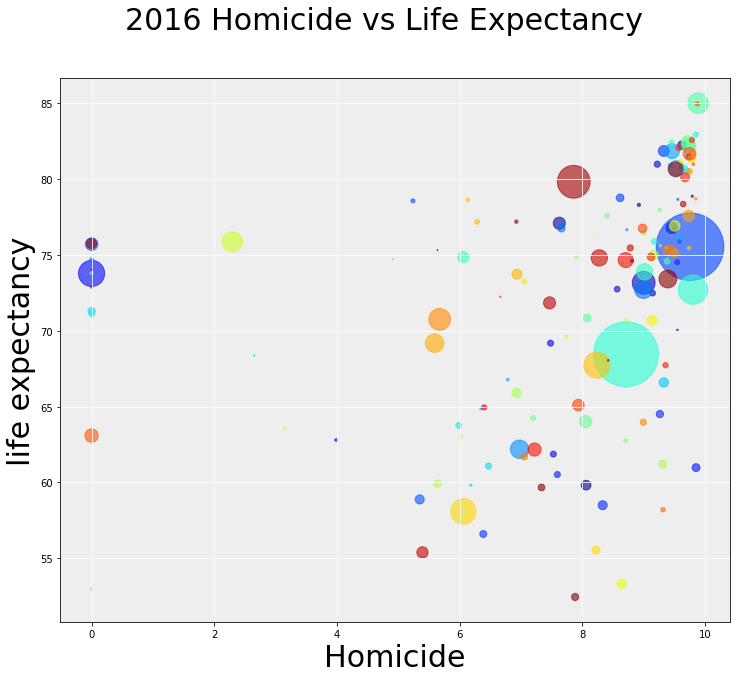

In [40]:
#plot
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(12, 10))
fig.suptitle('2016 Homicide vs Life Expectancy', fontsize=30)

scatter = ax.scatter(Homicide,
                     life_expectancy,
                     s = area, 
                     c = df16['country'].astype('category').cat.codes,
                     alpha=0.6,
                     cmap=plt.cm.jet)

ax.set_xlabel('Homicide', size=30)
ax.set_ylabel('life expectancy', size=30)
ax.grid(color='white', linestyle='solid')
plt.show()

In [ ]:
labels = []

# Loop over the index of the country
for i in range(len(df16.index)):

    # Extract the value of the fifth column, which in our case is Homicide
    # and transpose it
    label = df16.ix[[i], 2:5].T

    # Label it with the country name
    label.columns = [df16.country[i]]

    # append it to the list. str()
    labels.append(str(label.to_html()))
    
    

In [ ]:
# Define the html tooltip associated to the scatter plot, pass the labels
tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels)


# Connect it to the figure
mpld3.plugins.connect(fig, tooltip)

# Show
#mpld3.save_html(fig, 'chart.html')
mpld3.display()

TypeError: Object of type ndarray is not JSON serializable

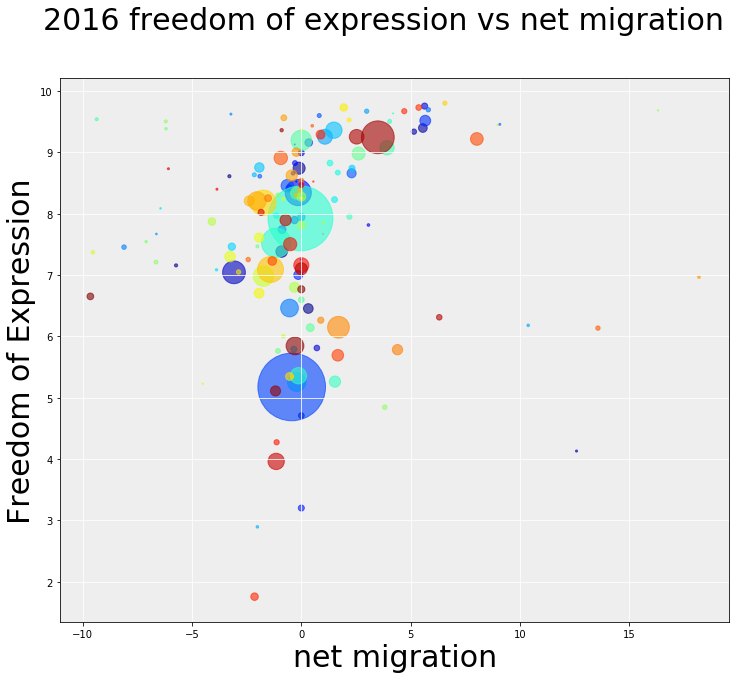

In [39]:
#plot
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(12, 10))
fig.suptitle('2016 freedom of expression vs net migration', fontsize=30)

scatter = ax.scatter(net_migration,
                     Freedom_of_Expression,
                     s = area, 
                     c = df16['country'].astype('category').cat.codes,
                     alpha=0.6,
                     cmap=plt.cm.jet)

ax.set_xlabel('net migration', size=30)
ax.set_ylabel('Freedom of Expression', size=30)
ax.grid(color='white', linestyle='solid')
plt.show()

TypeError: Object of type ndarray is not JSON serializable

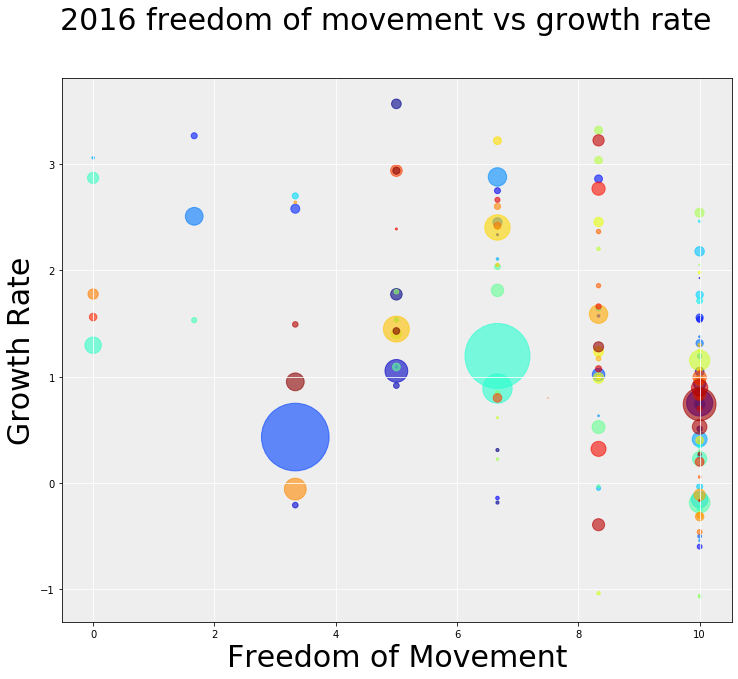

In [46]:
#plot
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(12, 10))
fig.suptitle('2016 freedom of movement vs growth rate', fontsize=30)

scatter = ax.scatter(free_movement,
                     growth_rate,
                     s = area, 
                     c = df16['country'].astype('category').cat.codes,
                     alpha=0.6,
                     cmap=plt.cm.jet)

ax.set_xlabel('Freedom of Movement', size=30)
ax.set_ylabel('Growth Rate', size=30)
ax.grid(color='white', linestyle='solid')
plt.show()

TypeError: Object of type ndarray is not JSON serializable

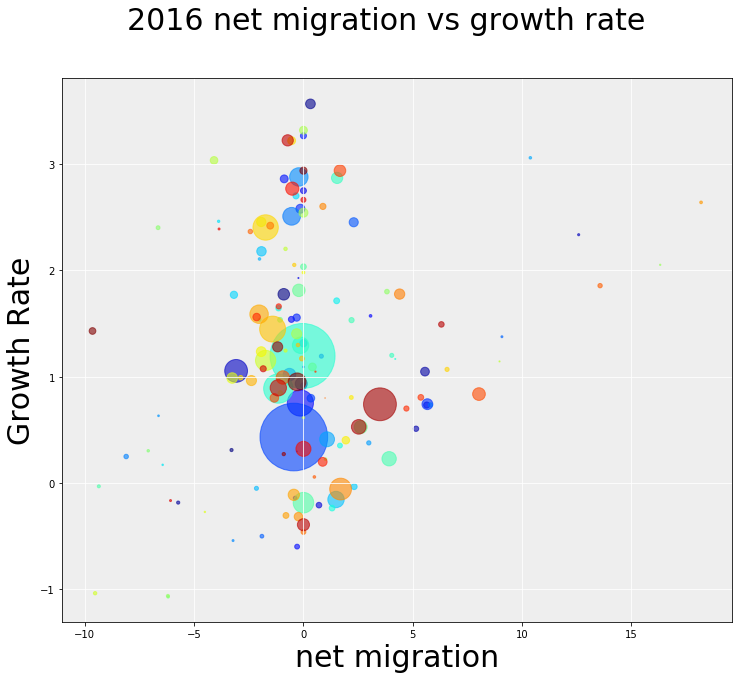

In [47]:
#plot
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(12, 10))
fig.suptitle('2016 net migration vs growth rate', fontsize=30)

scatter = ax.scatter(net_migration,
                     growth_rate,
                     s = area, 
                     c = df16['country'].astype('category').cat.codes,
                     alpha=0.6,
                     cmap=plt.cm.jet)

ax.set_xlabel('net migration', size=30)
ax.set_ylabel('Growth Rate', size=30)
ax.grid(color='white', linestyle='solid')
plt.show()